In [192]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('layoff2way.csv')
df

iso        composer
0    de          Gretry
1    de         Traetta
2    de          Bibalo
3    de          Kerger
4    de           Vaage
..   ..             ...
595  br  Villani-Cortes
596  by        Cimarosa
597  by     Leoncavallo
598  by          Minkov
599  by       Pergolesi

[600 rows x 2 columns]

In [193]:
import networkx as nx
from networkx.algorithms import bipartite


# Build the network

# Create an empty graph with no nodes and no edges
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row['iso'], row['composer'])


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print("Degree sequence:", degree_sequence)



Degree sequence: [54, 48, 44, 42, 33, 26, 21, 21, 15, 15, 14, 14, 14, 14, 14, 13, 12, 12, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [194]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   iso       600 non-null    object
 1   composer  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


iso     composer
count   600          600
unique   56          343
top      us  Leoncavallo
freq     54           10

In [195]:
!pip install networkx matplotlib

In [196]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Đọc tệp dữ liệu
df = pd.read_csv('layoff2way.csv')

# Tạo đồ thị bipartite
B = nx.Graph()
iso = df['iso']
composer = df['composer']
B.add_nodes_from(df['iso'], bipartite=0)
B.add_nodes_from(df['composer'], bipartite=1)
# B.add_edges_from(zip(df['iso'], df['composer']))

In [197]:
for index, row in df.iterrows():
  B.add_edge(row['composer'], row['iso'], weight=1)

<Figure size 1200x1200 with 0 Axes>

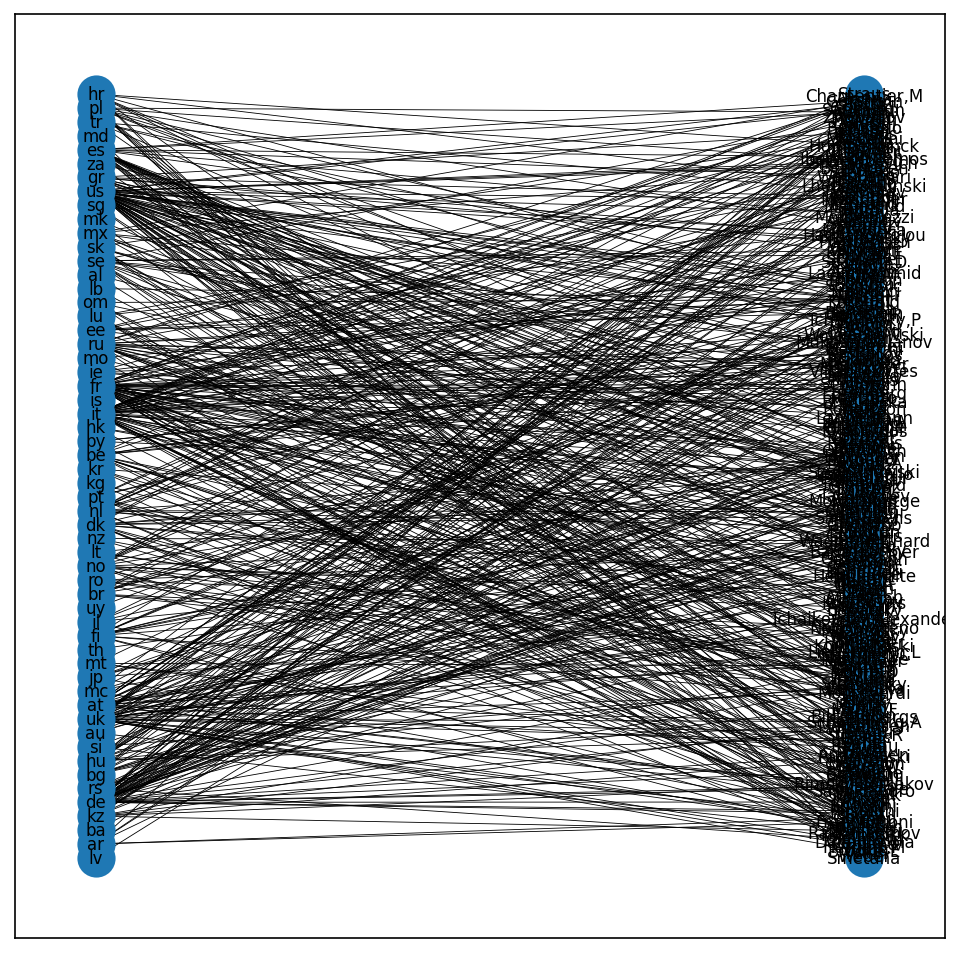

In [198]:
# # Vẽ đồ thị
# pos = {n: (1, i) for i, n in enumerate(df['iso'].unique())}
# pos.update({n: (2, i) for i, n in enumerate(df['composer'].unique())})
# nx.draw(B, pos=pos, with_labels=True)
# plt.show()

plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=150)
nx.draw_networkx(
    B, 
    pos = nx.drawing.layout.bipartite_layout(B, iso), 
    font_size=8, 
    width=0.4
)

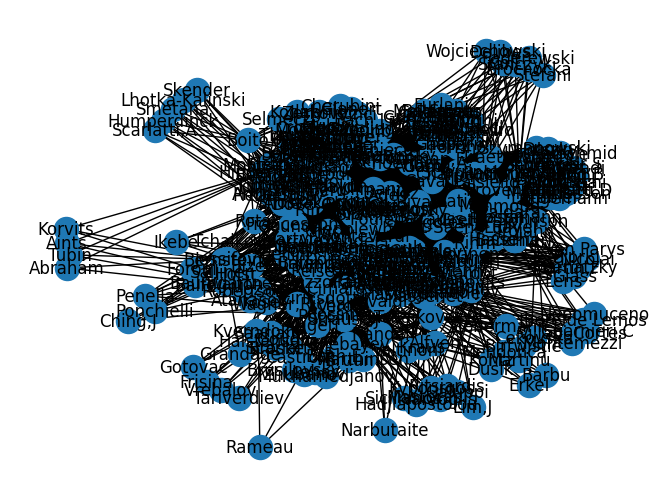

In [199]:
X = set(df['composer'])
G = nx.bipartite.projected_graph(B, X)

# Vẽ đồ thị unipartite
nx.draw(G, with_labels=True)
plt.show()
# G = bipartite.weighted_projected_graph(B, composer)
# plt.figure(figsize=(12, 12))

# layout = nx.spring_layout(G)

# nx.draw_networkx_nodes(
#     G,
#     layout,
#     nodelist=composer,
#     node_size=150,
#     node_color= 'blue')
# nx.draw_networkx_edges(G, layout,  width=0.1, edge_color="#cccccc")

# node_labels = dict(zip(composer, composer) )
# nx.draw_networkx_labels(G, layout, labels=node_labels)

# plt.axis('off')
# plt.title("Graph Team")
# plt.show()

# Độ đo Degree

In [200]:
import pandas as pd
import operator

# Code không dùng thư viện
# def degree_centrality(G):
#     n = len(G)
#     degree = dict.fromkeys(G, 0)
#     for node in G:
#         degree[node] = len(G[node])
#     centrality = {node: degree[node] / (n - 1) for node in G}
#     return centrality

# degree = degree_centrality(G)
# degree_centrality(G)

#-----------------------------------------------------------------
# Code demo

def degrees_centrality(G):
    """Compute the degree centrality for nodes.

    The degree centrality for a node v is the fraction of nodes it
    is connected to.

    Parameters
    ----------
    G : graph
      A networkx graph

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with degree centrality as the value.

    Examples
    --------
    >>> G = nx.Graph([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)])
    >>> nx.degree_centrality(G)
    {0: 1.0, 1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}

    See Also
    --------
    betweenness_centrality, load_centrality, eigenvector_centrality

    Notes
    -----
    The degree centrality values are normalized by dividing by the maximum
    possible degree in a simple graph n-1 where n is the number of nodes in G.

    For multigraphs or graphs with self loops the maximum degree might
    be higher than n-1 and values of degree centrality greater than 1
    are possible.
    """
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.degree()}
    return centrality


# degrees_centrality(X)

# degree= degrees_centrality(G)
# degree_table = pd.DataFrame(degree, columns=['composer', 'Degree'])
# degree_table = degree_table.sort_values(by=['Degree','composer'], ascending=False)
# pd.set_option('display.max_rows', 50)
# degree_table.head(15)

# ----------------------------------------------------------------
# Code dùng thư viện

degree = nx.degree(G)
degree_table = pd.DataFrame(degree, columns=['composer', 'Degree'])
degree_table = degree_table.sort_values(by=['Degree','composer'], ascending=False)
pd.set_option('display.max_rows', 50)
degree_table.head(15)

composer  Degree
14   Rimsky-Korsakov     164
249             Orff     150
66             Cilea     137
84           Milhaud     125
224            Henze     117
61          Schubert     114
321          Cavalli     111
189        Paisiello     109
0              Weber     108
251      Saint-Saens     108
163            Gluck     108
261          Berlioz     106
285        Pergolesi     105
237         Ratniece     104
58           Poulenc      99

In [201]:
G

# Closeness Centrabiloity


In [202]:
import pandas as pd
import operator

close_centrality = nx.closeness_centrality(G)

data = {
    'composer': close_centrality.keys(),
    'Close centrality': close_centrality.values()
} 
close_centrality_table = pd.DataFrame.from_dict(data) 
close_centrality_table = close_centrality_table.sort_values(by=['Close centrality','composer'], ascending=False) 

pd.set_option('display.max_rows', 50)
close_centrality_table.head(15)

composer  Close centrality
14   Rimsky-Korsakov          0.657692
249             Orff          0.632163
66             Cilea          0.616216
84           Milhaud          0.604240
224            Henze          0.594783
163            Gluck          0.593750
61          Schubert          0.591696
321          Cavalli          0.584615
261          Berlioz          0.583618
251      Saint-Saens          0.580645
58           Poulenc          0.580645
82       Leoncavallo          0.580645
0              Weber          0.579661
189        Paisiello          0.578680
237         Ratniece          0.577703

# Harmonic Centrality

In [203]:
import pandas as pd
import operator

harmonic_centrality = nx.harmonic_centrality(G)

data = {
    'composer': harmonic_centrality.keys(),
    'Harmonic centrality': harmonic_centrality.values()
} 
harmonic_centrality_table = pd.DataFrame.from_dict(data) 
harmonic_centrality_table = harmonic_centrality_table.sort_values(
    by=['Harmonic centrality', 'composer'], 
    ascending=False)

harmonic_centrality_table.head(15)

composer  Harmonic centrality
14   Rimsky-Korsakov           253.000000
249             Orff           244.833333
66             Cilea           238.166667
84           Milhaud           232.333333
224            Henze           228.166667
61          Schubert           226.666667
163            Gluck           225.000000
321          Cavalli           224.500000
189        Paisiello           222.833333
251      Saint-Saens           222.833333
0              Weber           222.666667
261          Berlioz           222.666667
237         Ratniece           221.000000
285        Pergolesi           220.166667
58           Poulenc           219.833333

# Betweenness Centrability

In [204]:
import pandas as pd
import operator

# Code dùng thư viện 

betweenness_centrality = nx.betweenness_centrality(G)

data = {
    'composer': betweenness_centrality.keys(),
    'Betweenness_centrality': betweenness_centrality.values()
} 
betweenness_centrality_table = pd.DataFrame.from_dict(data) 
betweenness_centrality_table = betweenness_centrality_table.sort_values(
    by=['Betweenness_centrality','composer'], 
    ascending=False) 

pd.set_option('display.max_rows', 50)
betweenness_centrality_table.head(15)



# Code không dùng thư viện

# def betweenness_centrality(G):
#     # Khởi tạo giá trị betweenness cho tất cả các đỉnh bằng 0
#     betweenness = {node: 0.0 for node in G.nodes()}

#     # Duyệt qua tất cả các đỉnh trong đồ thị
#     for node in G.nodes():
#         # Tìm tất cả các đường đi ngắn nhất từ đỉnh hiện tại đến tất cả các đỉnh khác trong đồ thị
#         paths = nx.shortest_path(G, source=node, weight='weight')

#         # Tính toán giá trị betweenness cho tất cả các cạnh trong đường đi
#         delta = {node: 0.0 for node in G.nodes()}
#         for target in paths:
#             if target == node:
#                 continue
#             path = paths[target]
#             for i in range(len(path) - 1):
#                 source = path[i]
#                 successor = path[i + 1]
#                 delta[successor] += 1.0
#                 edge = (min(source, successor), max(source, successor))
#                 betweenness[edge] += 1.0

#         # Cộng giá trị delta cho giá trị betweenness của tất cả các đỉnh
#         for target in delta:
#             if target != node:
#                 betweenness[target] += delta[target] / 2.0

#     # Chia giá trị betweenness cho tổng số cặp đỉnh trong đồ thị
#     n = len(G)
#     scale = 1.0 / ((n - 1) * (n - 2) / 2.0)
#     for node in betweenness:
#         betweenness[node] *= scale

#     return betweenness




composer  Betweenness_centrality
14   Rimsky-Korsakov                0.075645
163            Gluck                0.048833
66             Cilea                0.041526
249             Orff                0.040028
321          Cavalli                0.033585
82       Leoncavallo                0.033412
58           Poulenc                0.033241
189        Paisiello                0.031111
288         Massenet                0.029001
79           Britten                0.026733
251      Saint-Saens                0.026514
166          Menotti                0.026135
161            Hasse                0.020898
285        Pergolesi                0.020755
84           Milhaud                0.019733

# Compute Communicate Betweenness


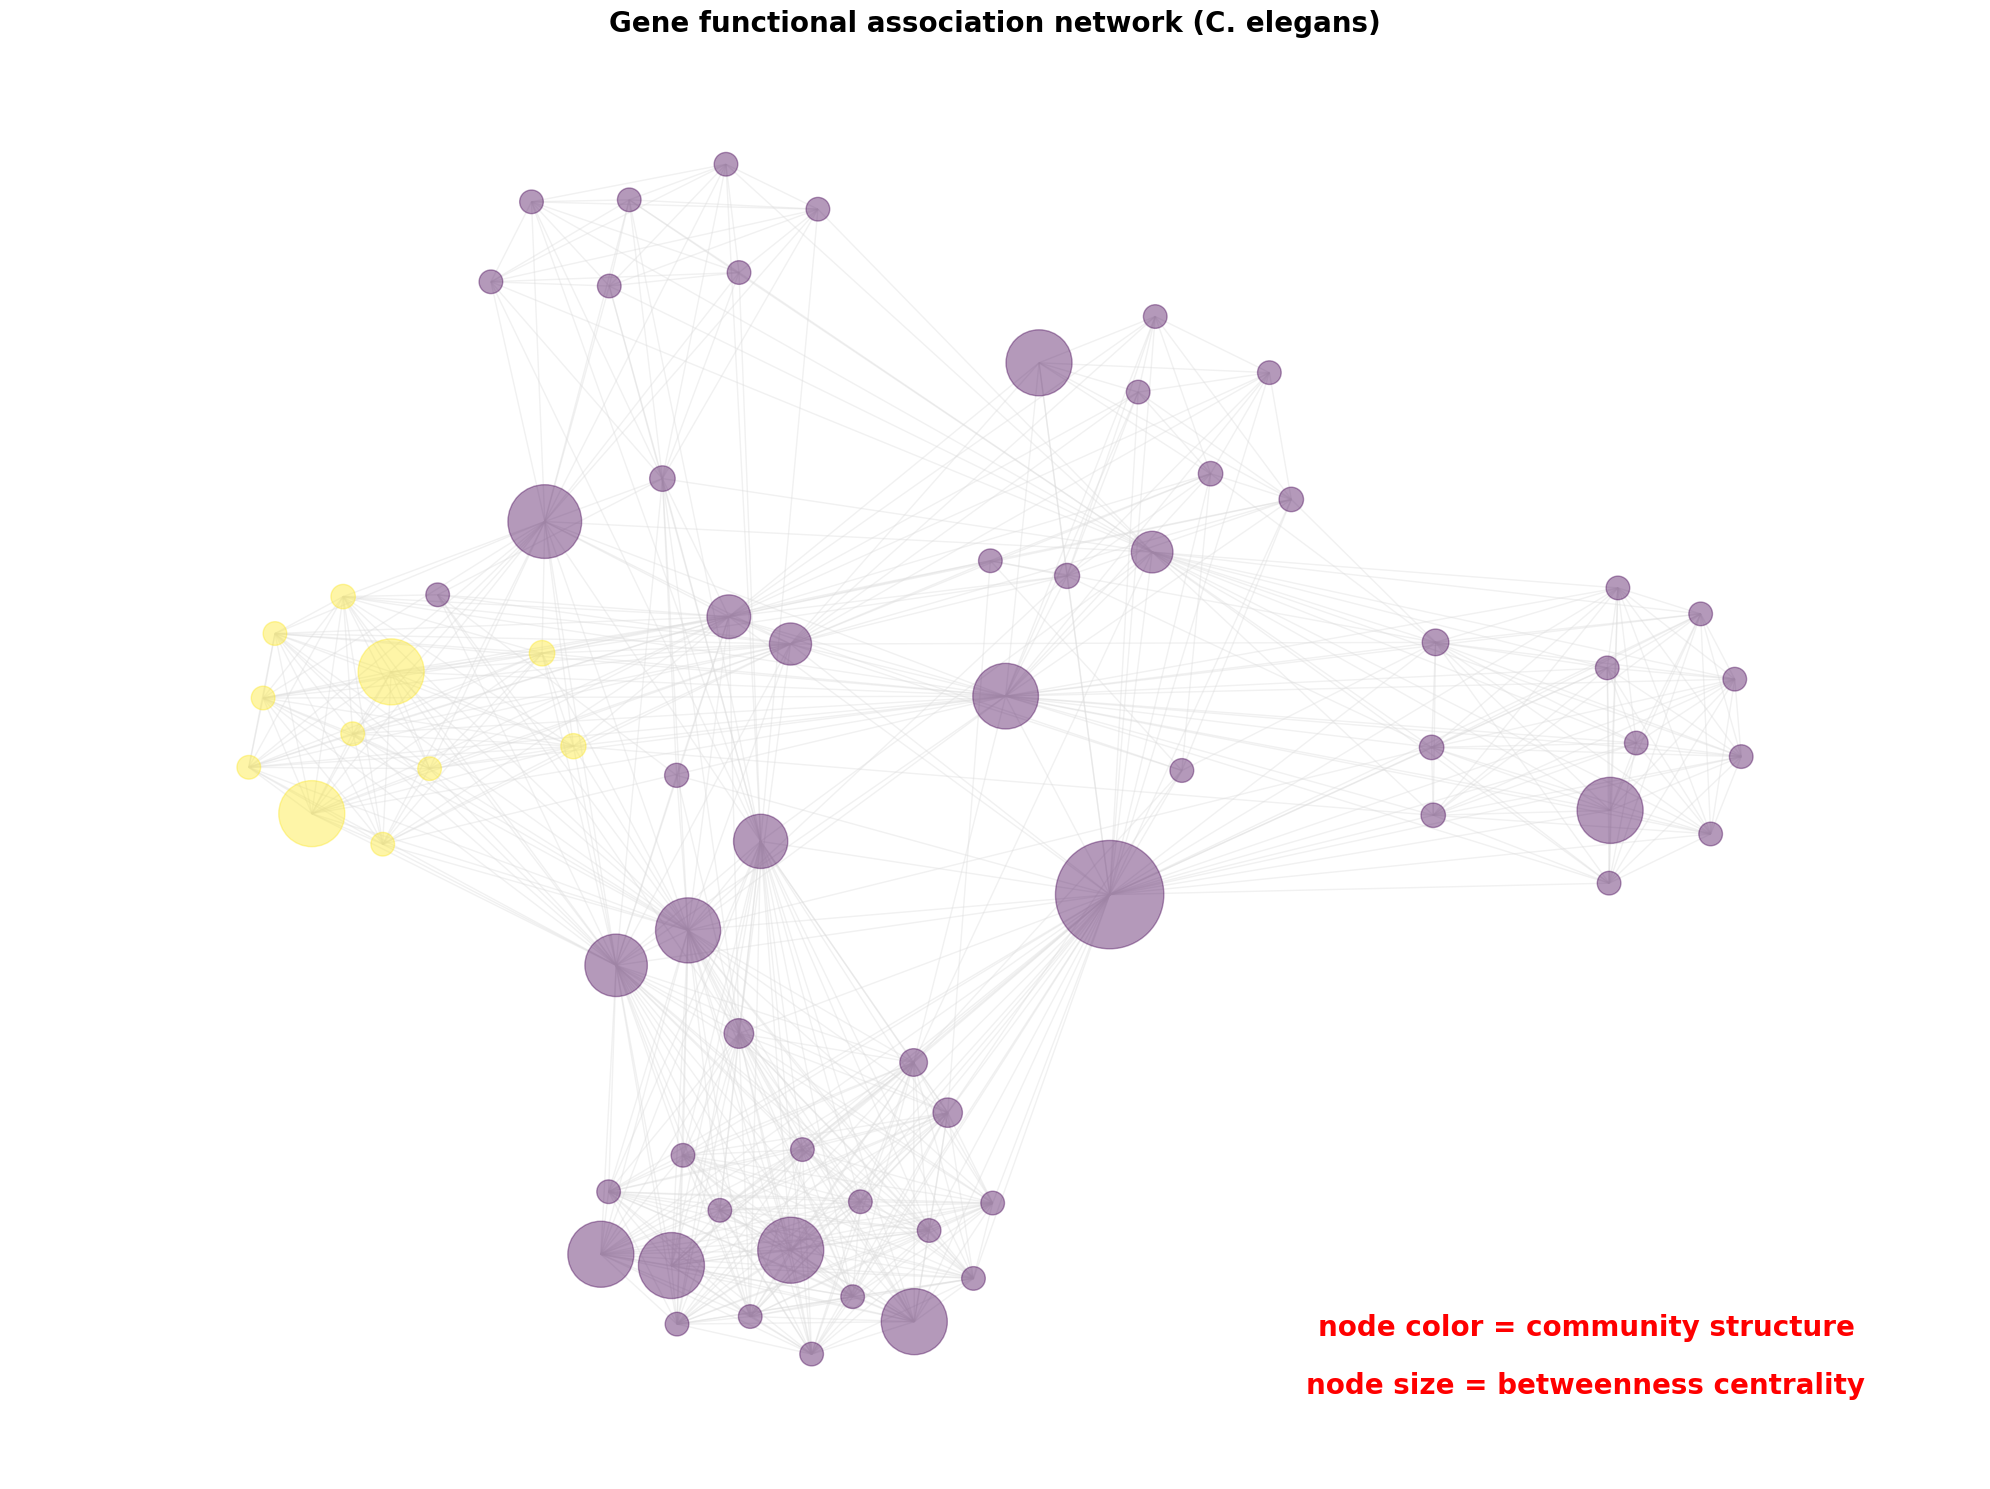

In [205]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
# G = nx.read_edgelist("WormNet.v3.benchmark.txt")

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

# Eigenvector Centrability

In [206]:
import pandas as pd
import operator

eigenvector_centrality = nx.eigenvector_centrality(G, weight="weight")

data = {
    'composer': eigenvector_centrality.keys(),
    'Eigenvector centrality': eigenvector_centrality.values()
} 
eigenvector_centrality_table = pd.DataFrame.from_dict(data) 
eigenvector_centrality_table = eigenvector_centrality_table.sort_values(
    by=['Eigenvector centrality', 'composer'], 
    ascending=False) 

eigenvector_centrality_table.head(15)

composer  Eigenvector centrality
21          Milhaud                0.242448
0             Weber                0.238325
4   Rimsky-Korsakov                0.233210
38             Gorb                0.198574
48             Berg                0.197845
10          Borodin                0.192049
53            Wargo                0.185585
55            Suppe                0.182599
40            Okoye                0.182599
46         Machover                0.182599
59         Gordon,R                0.182599
63          Crozier                0.182599
49           Beeson                0.182599
43           Alfano                0.182599
36             Toch                0.182599

In [207]:
from networkx.algorithms import bipartite

nx.is_connected(B)
bottom_nodes, top_nodes = bipartite.sets(B)
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
print(round(bipartite.density(B, bottom_nodes), 2))
G = bipartite.projected_graph(B, bottom_nodes)


0.03


In [208]:

pr=nx.pagerank(G,0.85)
pr

{'Smetana': 0.001325737204678303,
 'Weber': 0.00652611672927745,
 'Yvain': 0.0030514678210233344,
 'Brooke,E': 0.0024145026114117877,
 'Bruun': 0.0014429507783418883,
 'Herbert,M': 0.0024145026114117877,
 'Copland': 0.005634522152492817,
 'Dallapiccola': 0.004503097578437982,
 'Cimarosa': 0.003909934659086067,
 'Sallinen': 0.0014583040735871326,
 'Kverndokk': 0.0016492793528113097,
 'Rakhmaninov': 0.002544004939082924,
 'Donizetti': 0.004880796261447139,
 'Delibes': 0.0014393542296126138,
 'Anderson': 0.0024145026114117877,
 'Foroni': 0.0010091073947543427,
 'Francesconi': 0.003508916938631115,
 'Simoni': 0.0029091706626876847,
 'Gounod': 0.003966286313031578,
 'Bizet': 0.0017997326255198526,
 'Gorb': 0.0055691469438782166,
 'Respighi': 0.002775028433880625,
 'Lim,J': 0.0006475237832357103,
 'Spontini': 0.0030514678210233344,
 'Chapi': 0.0021190184074626494,
 'Johnson': 0.0033353971409967554,
 'Auzet': 0.0030514678210233344,
 'Okoye': 0.0032740769239679043,
 'Stanczyk': 0.0014393542296

# Thuật toán phát hiện cộng đồng


# Louvian

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24992\2438645110.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap( 'viridis', max(partition. values()) + 1)


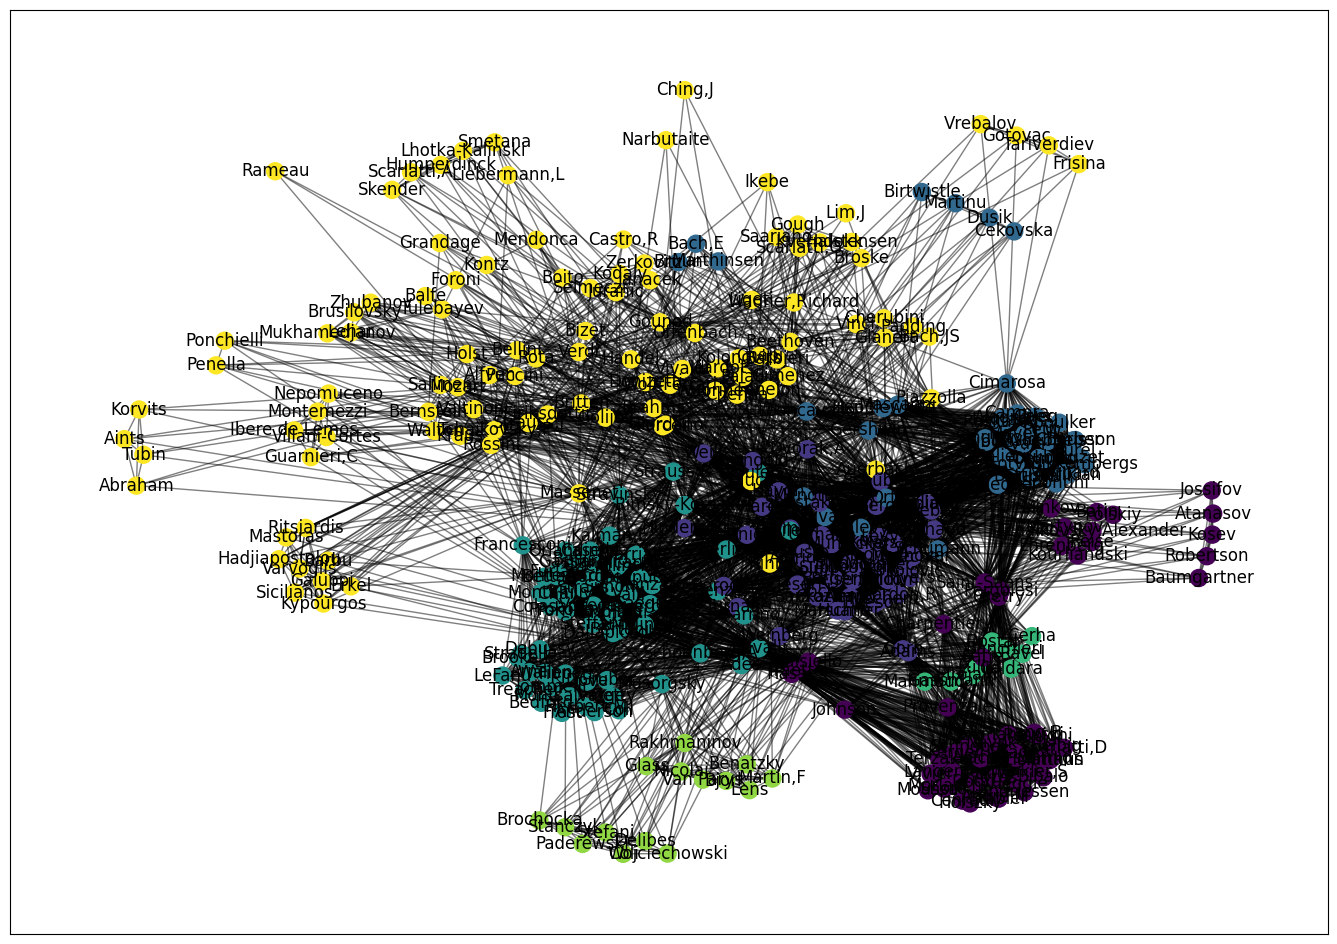

In [209]:
import community.community_louvain as community_louvain
from matplotlib import cm
plt.figure(figsize=(17, 12))

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap( 'viridis', max(partition. values()) + 1)
nx.draw_networkx_nodes(G, pos, partition. keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges (G, pos, alpha=0.5)
nx.draw_networkx_labels (G, pos)

plt.show()

In [210]:
import numpy as np
values = list(partition.values())

print('Số cộng đồng là:', len(np.unique(values)))

Số cộng đồng là: 7


In [212]:
import csv

# Đường dẫn và tên file CSV
csv_file_path = "text.csv"

# Danh sách các cụm
clusters = []

# Ghi thông tin cụm vào danh sách
for node, cluster in partition.items():
    clusters.append((node, cluster))

# Ghi danh sách cụm vào file CSV
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Node", "Cluster"])  # Ghi header
    writer.writerows(clusters)  # Ghi thông tin cụm

print("Đã ghi thông tin cụm vào file CSV.")


# ------------------------------------------------

df_cum2 = pd.DataFrame(columns=['composer'])
for name, k in partition.items():
    if k == 1:
      df_cum2 =df_cum2.append({'composer':name}, ignore_index=True)
df_cum2
df2 = df.copy()
df2= df2[df2['composer'].isin(df_cum2['composer'])]
df2.to_csv("cum2.csv", index = False, header=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24992\4134772891.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cum2 =df_cum2.append({'composer':name}, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24992\4134772891.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cum2 =df_cum2.append({'composer':name}, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24992\4134772891.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cum2 =df_cum2.append({'composer':name}, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24992\4134772891.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cum

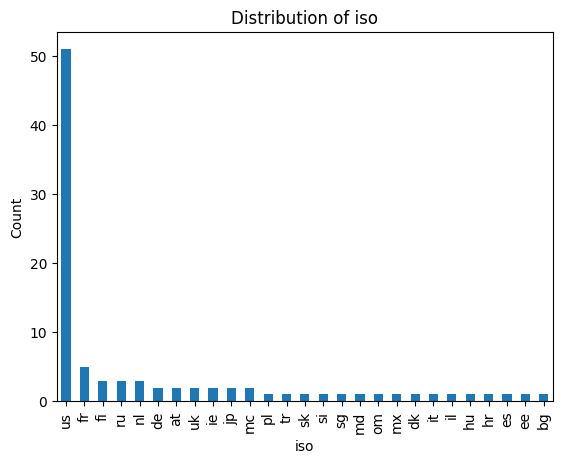

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn và tên file CSV
csv_file_path = "cum2.csv"

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv(csv_file_path)

# Tạo biểu đồ cột iso
df['iso'].value_counts().plot(kind='bar')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Distribution of iso')
plt.xlabel('iso')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()


In [ ]:
for i in range(len(np.unique(values))) :
  print("nhom ", i+1, "***************x***********")
  for name, k in partition.items() :
    if k == i:
      print(name+"!")

nhom  1 ***************x***********
Respighi!
Johnson!
Provenzale!
Paisiello!
Stabler!
Andriessen!
Winkler,S!
Gretry!
Antheil!
Jossifov!
Traetta!
Kosev!
Baumgartner!
Dogru!
Vaage!
Navok!
Holszky!
Saint-Saens!
Matthus!
Lang,B!
Vivier!
Szymanowski!
Eichmann!
Shore!
Helbig!
Langemann!
Robertson!
Ayres!
Pergolesi!
Morlacchi!
Kerger!
Bibalo!
Satie!
Andre,M!
Lackerschmid!
Heggie!
Scarlatti,D!
Schnebel!
Atanasov!
Cavalli!
Moussa!
Terzakis!
Hasse!
Conradi!
Charpentier,M!
nhom  2 ***************x***********
Weber!
Copland!
Gorb!
Okoye!
Musto!
Picker!
Tesori!
Alfano!
Soluri!
Nyman!
Moore,D!
Machover!
Ullmann!
Philidor!
Henze!
Beecher!
Berg!
Ratniece!
Schubert!
Adams!
Beeson!
Borodin!
Ellington!
Aldridge!
Felsenfeld!
Dvorak,A!
Milhaud!
Weill!
Turnage!
Hindemith!
Wargo!
Suppe!
Moravec!
Levy!
Marsalis!
Huang!
Mechem!
Gordon,R!
Korngold!
Haydn!
Sokolovic!
Bolcom!
Thomson!
Berger,J!
Crozier!
Muhly!
Marschner!
Myers!
Shostakovich!
Weinberg!
Sankaram!
Toch!
nhom  3 ***************x***********
Ravel!
Ca

# Thuật toán suprise comunities

# Girven newman

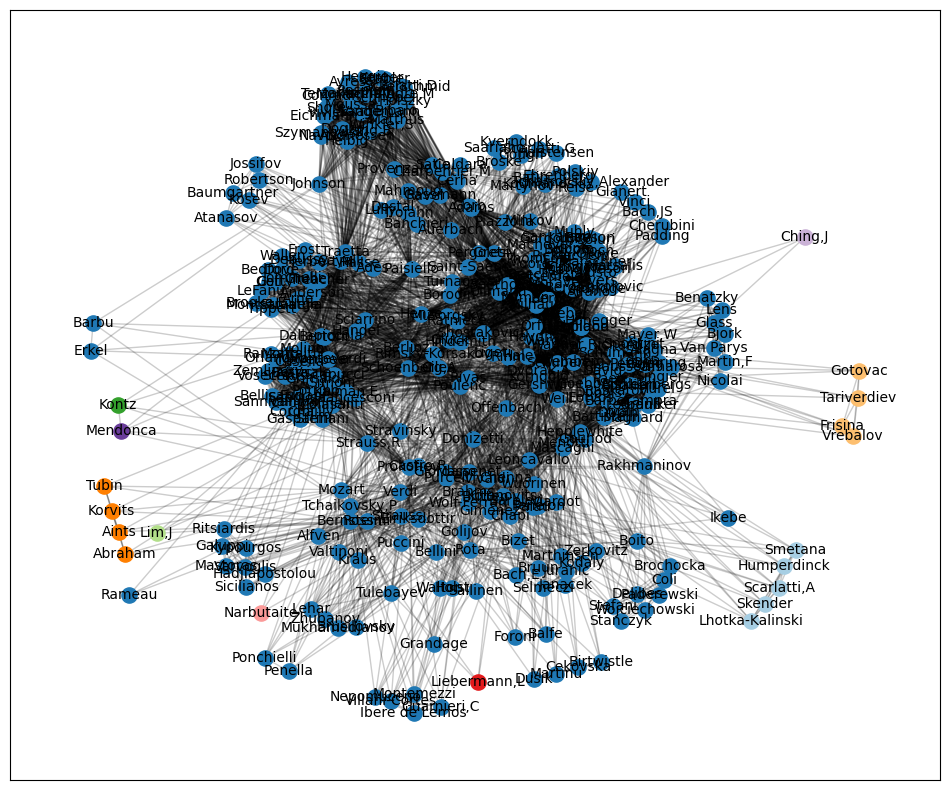

In [214]:
from networkx.algorithms.community.centrality import girvan_newman
import seaborn as sns

comp = girvan_newman(G)
k = 10
for i in range(k-1):
    comms = next(comp)

plt.figure(figsize=(12, 10))
colors = sns.color_palette('Paired', n_colors=len(comms))
colors = colors.as_hex()
pos = nx.spring_layout(G)
for nodes, c in zip(comms, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=c, node_size=120)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()

In [ ]:
for i in range(len(comms)):
  print("nhom ", i+1, "**************************")
  for name in comms[i] :
      print(name)
  print("")

nhom  1 **************************
Smetana
Humperdinck
Scarlatti,A
Lhotka-Kalinski
Skender

nhom  2 **************************
Weber
Yvain
Brooke,E
Bruun
Cimarosa
Kverndokk
Rakhmaninov
Donizetti
Delibes
Auzet
Johnson
Bertoni
Provenzale
Rimsky-Korsakov
Ponchielli
Corghi
Gasparini
Gough
Alfven
Verdi
Paderewski
Ravel
Rameau
Palau
Arne
Picker
Tesori
Winkler,S
Schoenberg,A
Soluri
Gretry
Bjork
Holst
Salieri
Monteverdi
Van Parys
Cekovska
Rossini
Stravinsky
Martinu
Moore,D
Campra
Debussy
Honegger
Broske
Musorgsky
Nepomuceno
Benatzky
Barbu
Martynov
Kolonovits
Auerbach
Paer
Kraus
Poulenc
Hepplewhite
Schubert
Bedford
Zemlinsky
Borodin
Cilea
Wagner,Richard
Goebbels
Giordano
Navok
Strauss,J
Cherubini
Viardot
Matthus
Montsalvatge
Aldridge
Lang,B
Vivier
Britten
Gimenez
Felsenfeld
Leoncavallo
Eotvos
Milhaud
Aboulker
Eichmann
Turnage
Brahms
Steffani
Ritsiardis
Grandage
Ikebe
Brochocka
Ranzato
Barber
Getty
Lauba
Ayres
Levy
Marsalis
Prokofiev
Stradella
Halevy
Minkov
Sciarrino
Sicilianos
Valli
Morlacchi
M